In [1]:
import astropy.constants as const
import astropy.units as u
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import utils

from plotting import label_axes

# $\gamma$ absorption on EBL

Pair-production cross-section


beta star corresponding to max x-section =  0.7071067811865476


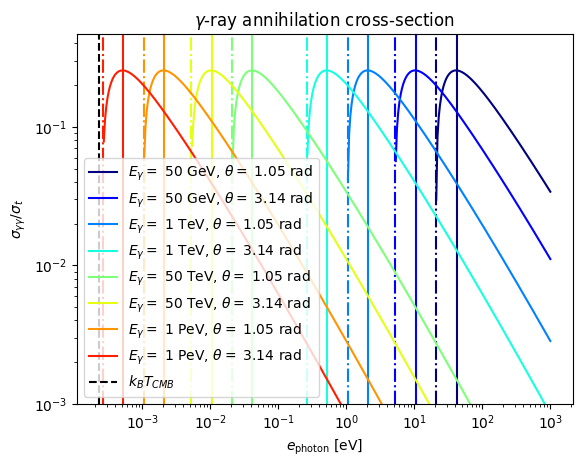

In [29]:
import itertools


aig, ax = plt.subplots()

cmap = matplotlib.colormaps.get("jet")
angles = list(reversed([scale * np.pi * u.rad for scale in (1, 1 / 3)]))
energies = [50 * u.GeV, 1 * u.TeV, 50 * u.TeV, 1 * u.PeV]
params = list(itertools.product(energies, angles))
for idx, (E_gamma, theta) in enumerate(params):
    color = cmap(idx / len(params))
    e_photon_grid = np.logspace(-6, 3, 500) * u.eV
    beta_star = np.sqrt(
        1
        - (2 * (const.m_e * const.c**2) ** 2)
        / (E_gamma * e_photon_grid * (1 - np.cos(theta)))
    )
    sigma = (
        (3 / 16)
        * (1 - beta_star**2)
        * (
            2 * beta_star * (beta_star**2 - 2)
            + (3 - beta_star**4) * np.log((1 + beta_star) / (1 - beta_star))
        )
    )

    ax.plot(
        e_photon_grid,
        sigma,
        color=color,
        label=f"$ E_\\gamma = $ {E_gamma:.0f}, $ \\theta = $ {theta:.2f}",
    )
    threshold = 2 * (const.m_e * const.c**2) ** 2 / (E_gamma * (1 - np.cos(theta)))
    ax.axvline(threshold, color=color, linestyle="-.")
    max_sigma_e = 2 * threshold
    ax.axvline(max_sigma_e, color=color)
    max_sigma_beta_star = np.sqrt(
        1
        - (2 * (const.m_e * const.c**2) ** 2)
        / (E_gamma * max_sigma_e * (1 - np.cos(theta)))
    )
print("beta star corresponding to max x-section = ", max_sigma_beta_star)

ax.axvline(const.k_B * utils.T_CMB, color="k", linestyle="--", label="$ k_B T_{CMB} $")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(bottom=1e-3)
label_axes(ax, xlabel="e_{\\mathrm{photon}}")
ax.set_title(f"$ \\gamma $-ray annihilation cross-section")
ax.set_ylabel("$ \\sigma_{\\gamma \\gamma} / \\sigma_t $")
ax.legend()
plt.show()